# 1. Setup and Import Libraries

Start by importing all necessary libraries.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap

# 2. Load the Dataset

Load the dataset into a Pandas DataFrame.

Provide an overview of the data.

In [5]:
# Load the dataset
dataset_path ='data.csv'
data = pd.read_csv(dataset_path)

# 3. Exploratory Data Analysis (EDA)
a. Understand the Data
- Use .info() and .describe() to get basic insights.

In [6]:
print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

b. Handle Missing Values

In [12]:
#Drop unnecessary columns (e.g., 'id', 'Unnamed: 32' if present)
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')

c. Check for missing values

In [13]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


d. Plot Correlation Heatmap

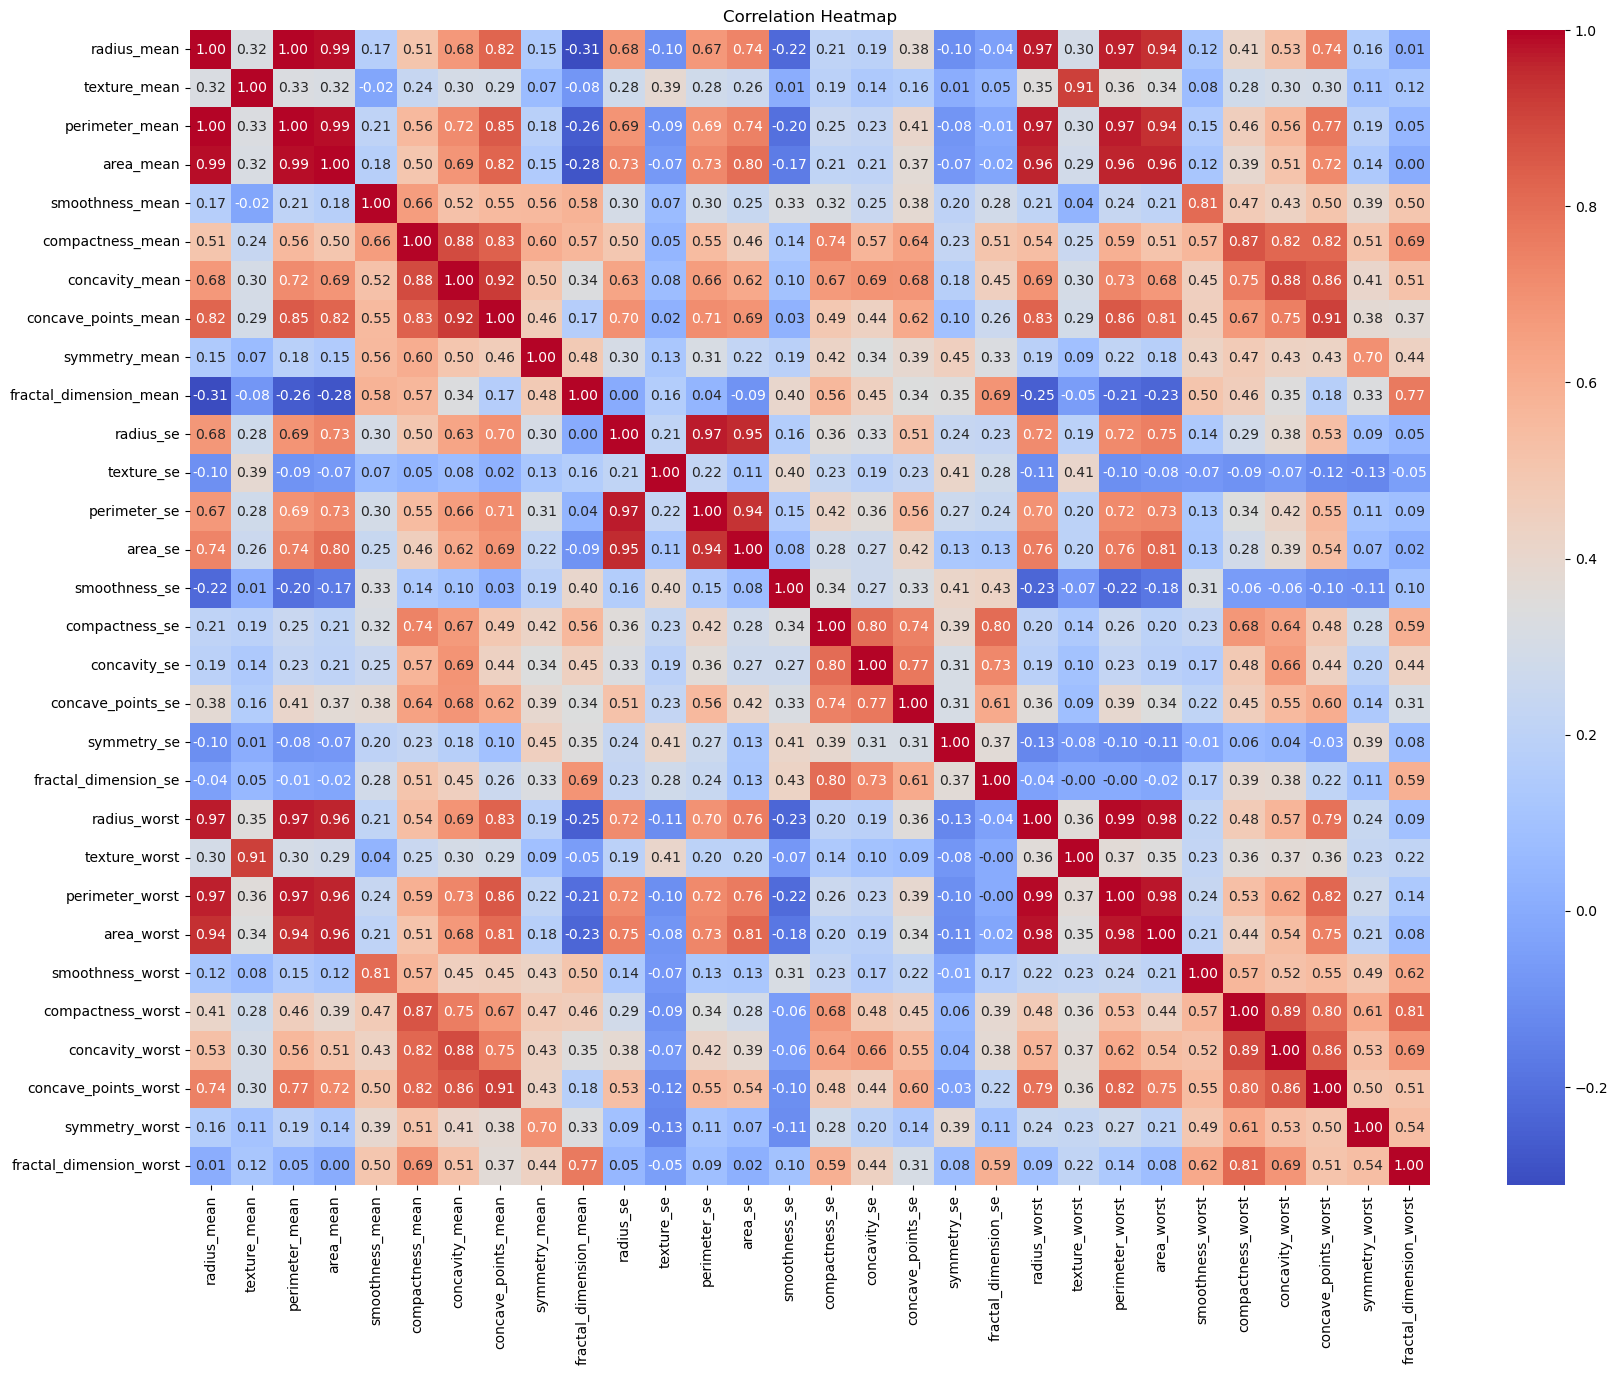

In [16]:
plt.figure(figsize=(20, 15))
data_without_column = data.drop(columns=['diagnosis'])

sns.heatmap(data_without_column.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


e. Highlight highly correlated features

In [17]:
data_without_column = data.drop(columns=['diagnosis'])
correlation_matrix = data_without_column.corr()
high_corr = correlation_matrix[abs(correlation_matrix) > 0.75]
print("\nHighly Correlated Features:")
print(high_corr)


Highly Correlated Features:
                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000           NaN        0.997855   0.987357   
texture_mean                     NaN      1.000000             NaN        NaN   
perimeter_mean              0.997855           NaN        1.000000   0.986507   
area_mean                   0.987357           NaN        0.986507   1.000000   
smoothness_mean                  NaN           NaN             NaN        NaN   
compactness_mean                 NaN           NaN             NaN        NaN   
concavity_mean                   NaN           NaN             NaN        NaN   
concave_points_mean         0.822529           NaN        0.850977   0.823269   
symmetry_mean                    NaN           NaN             NaN        NaN   
fractal_dimension_mean           NaN           NaN             NaN        NaN   
radius_se                        NaN           NaN             NaN        NaN   

f. Visualize Feature Distributions

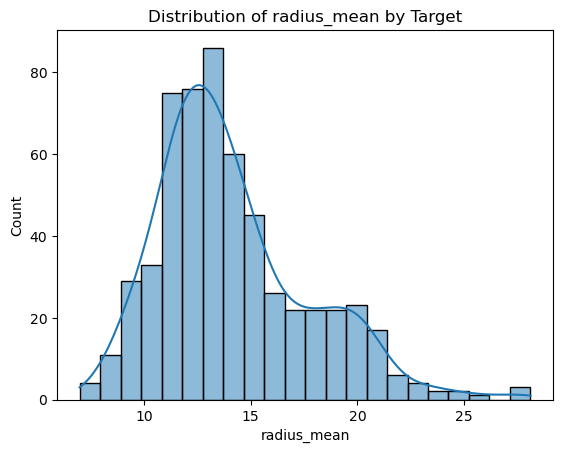

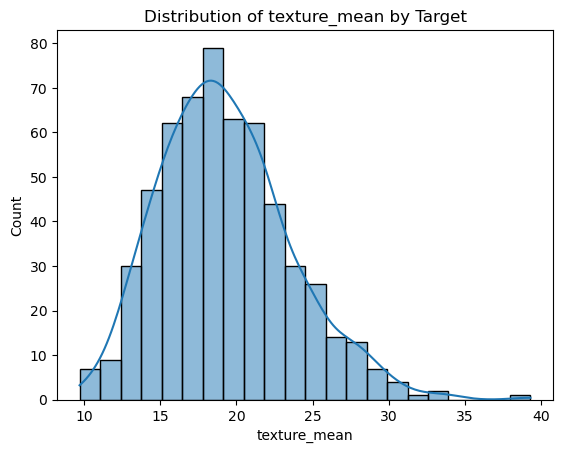

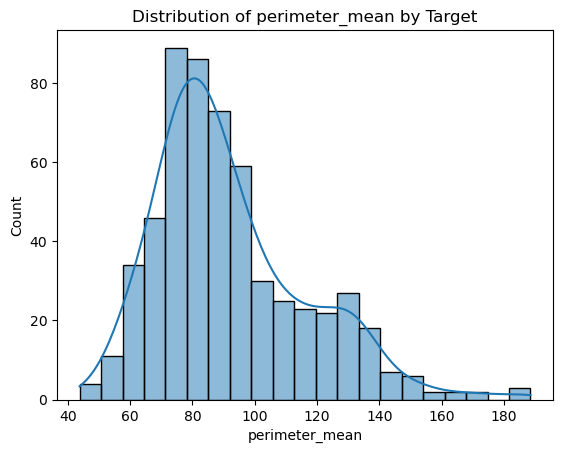

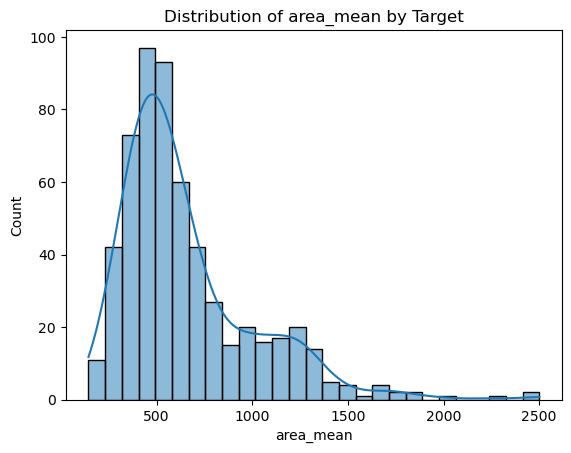

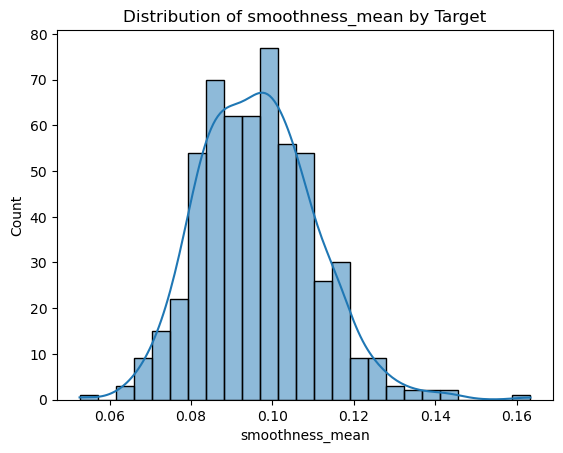

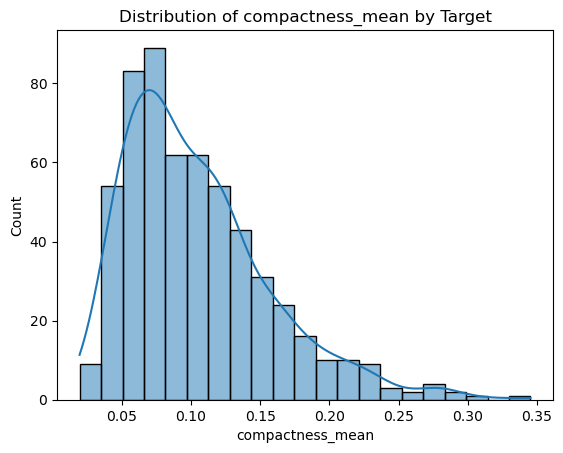

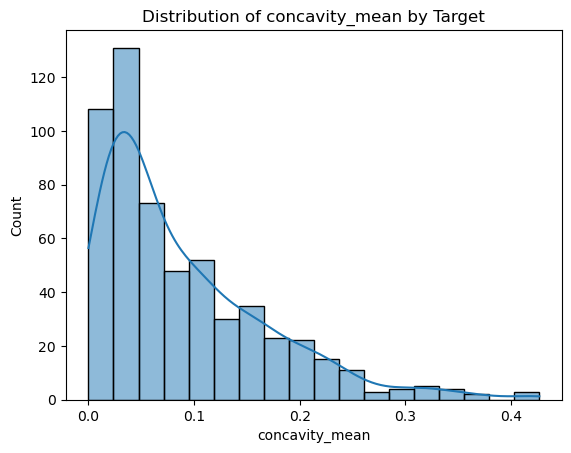

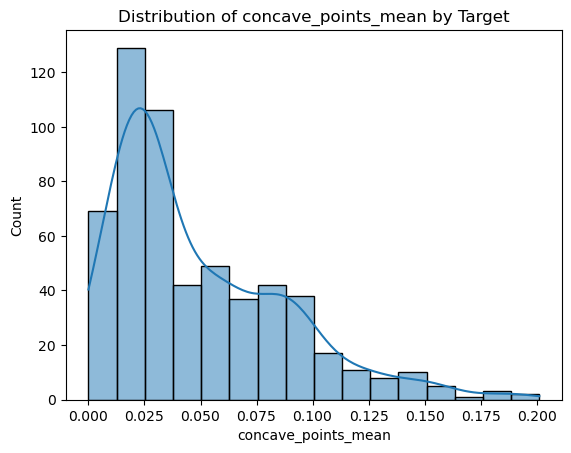

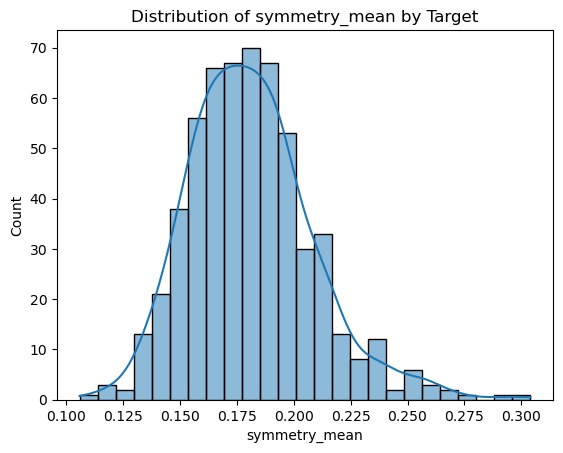

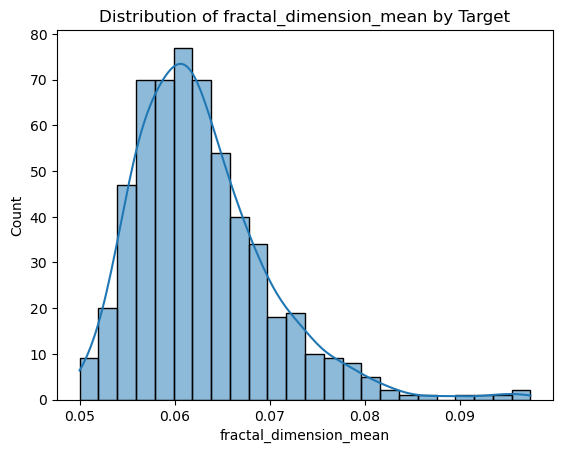

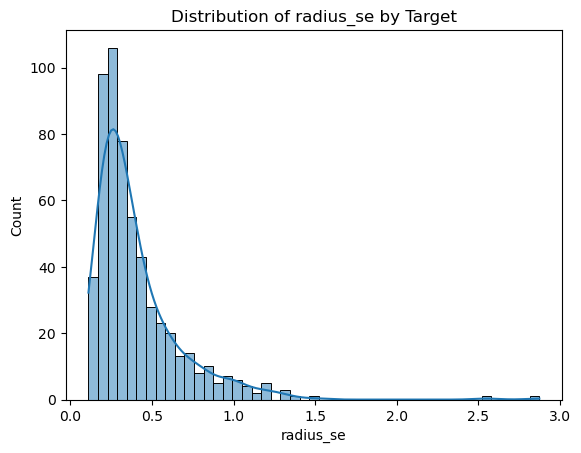

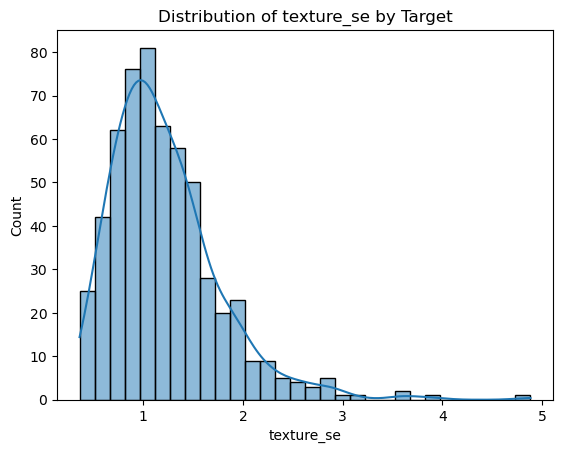

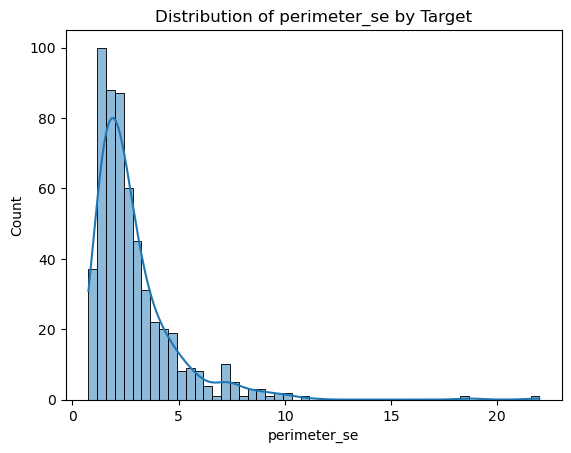

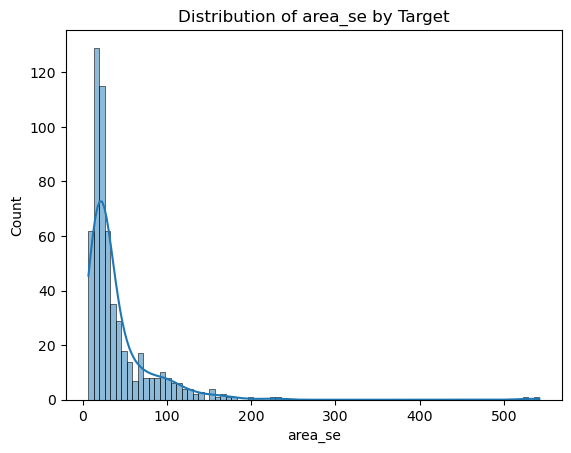

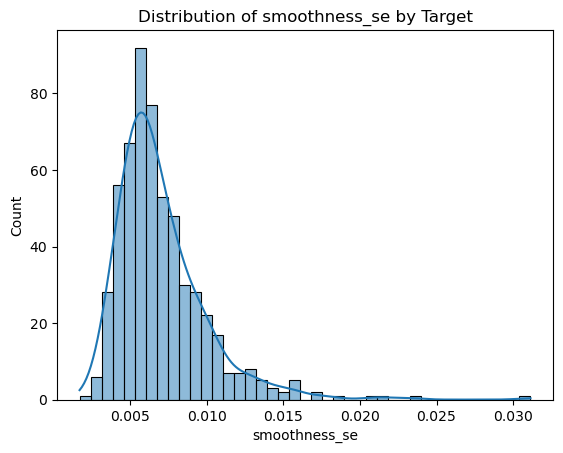

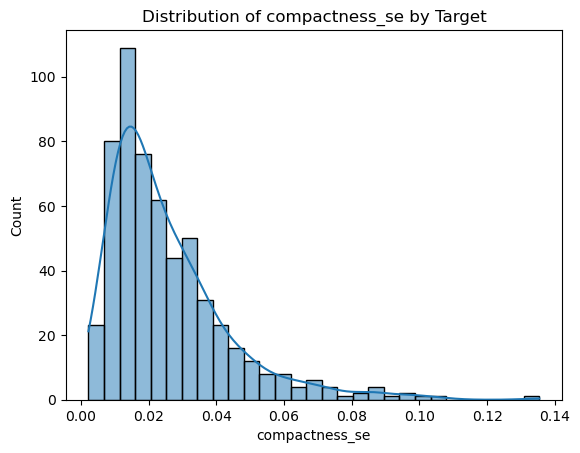

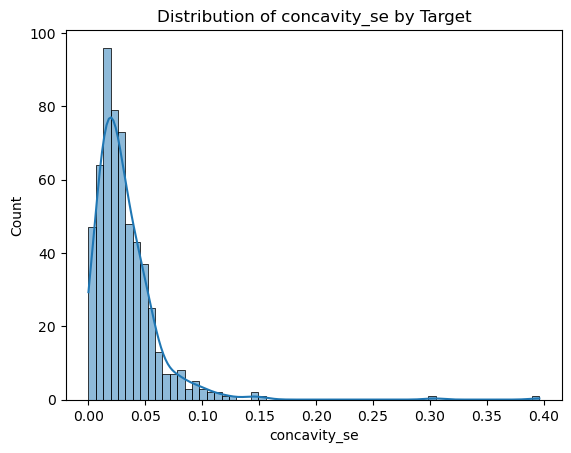

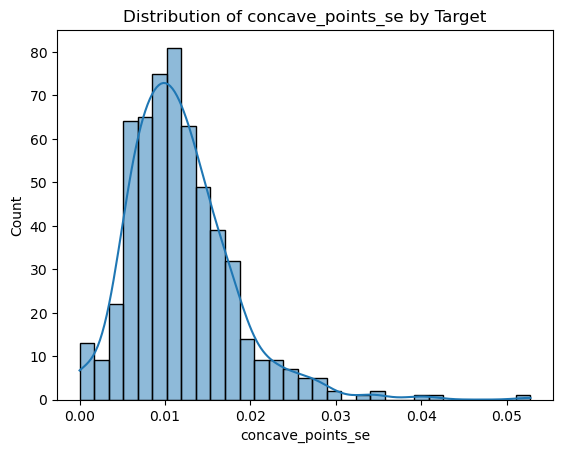

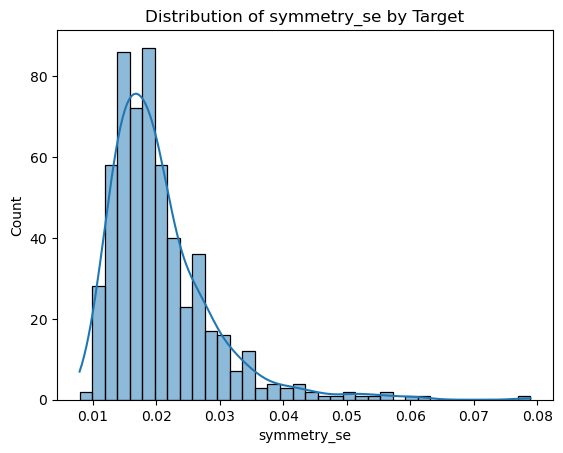

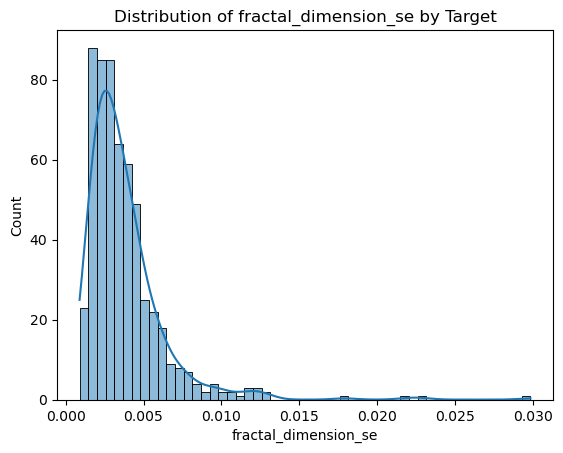

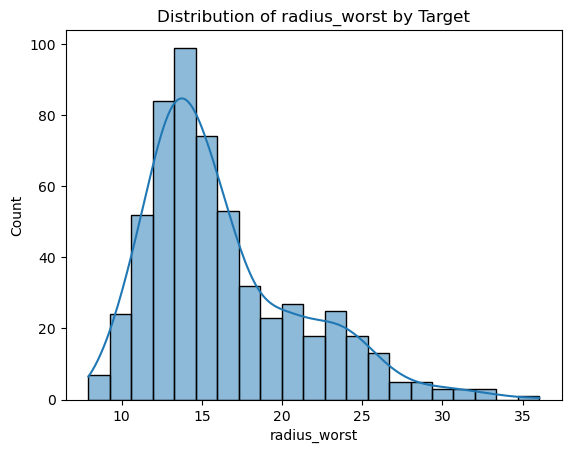

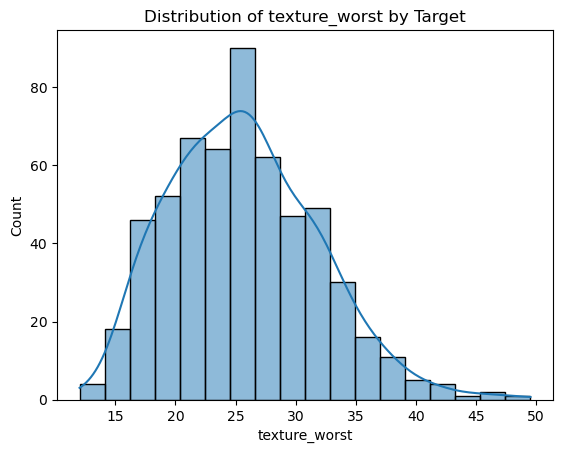

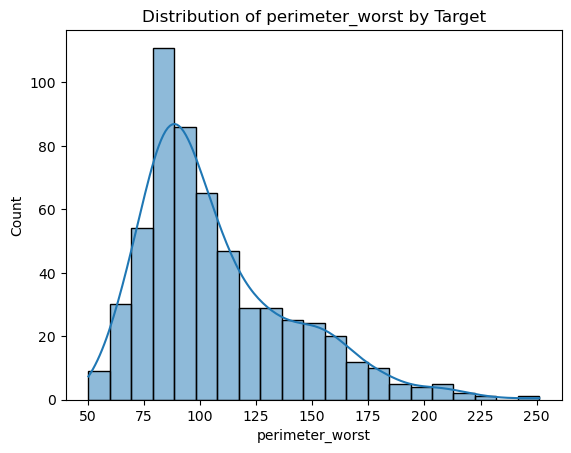

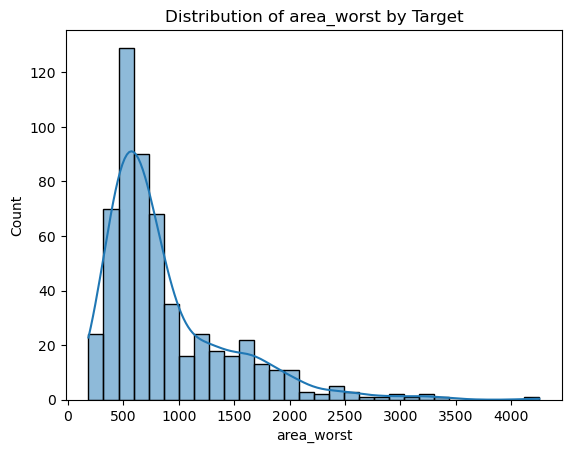

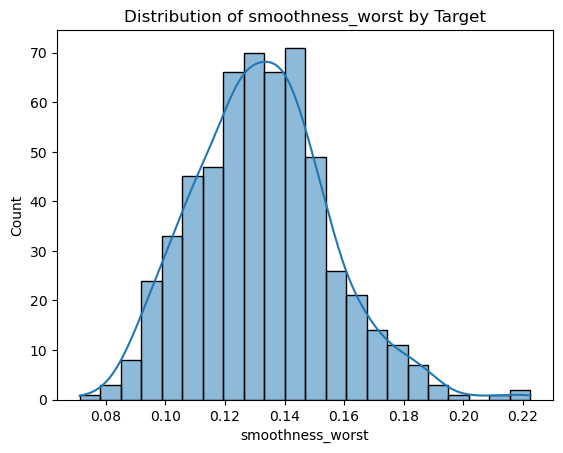

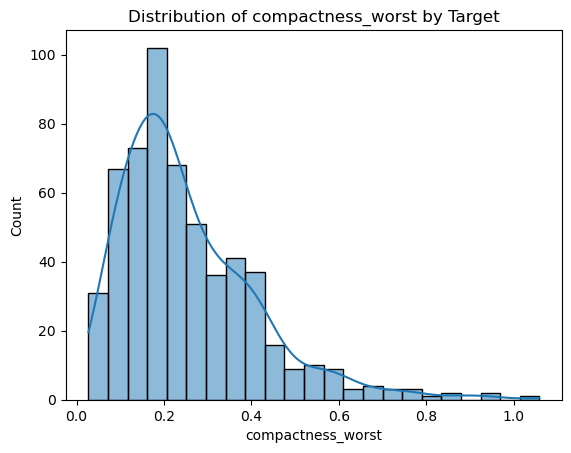

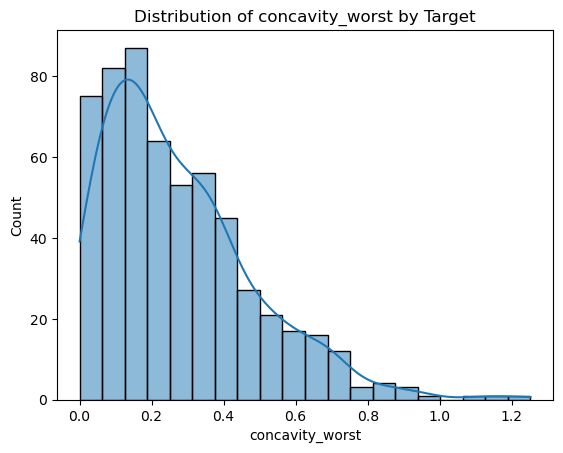

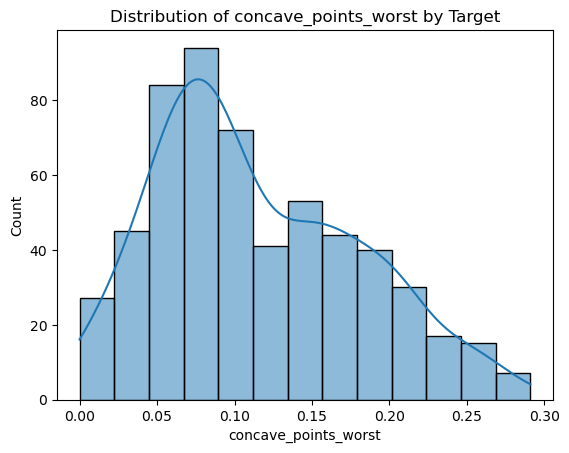

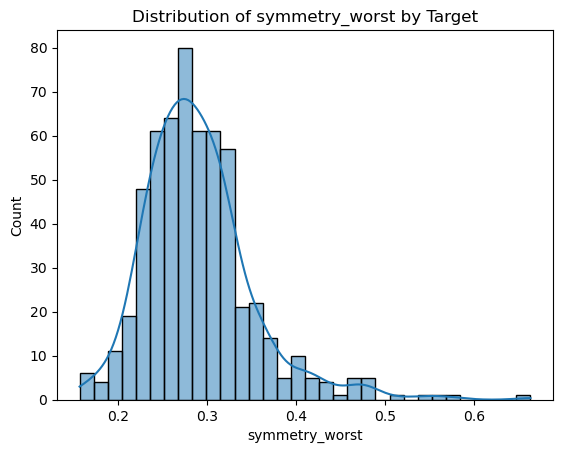

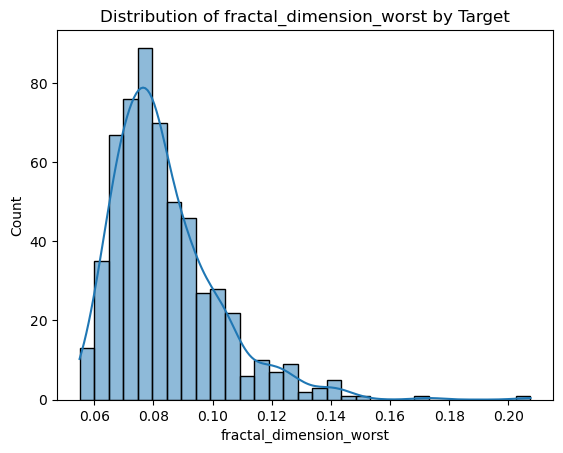

In [21]:
for column in data.columns[1:]:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column} by Target")
    plt.show()

g. Target Variable Distribution

Plot the distribution of the target variable.

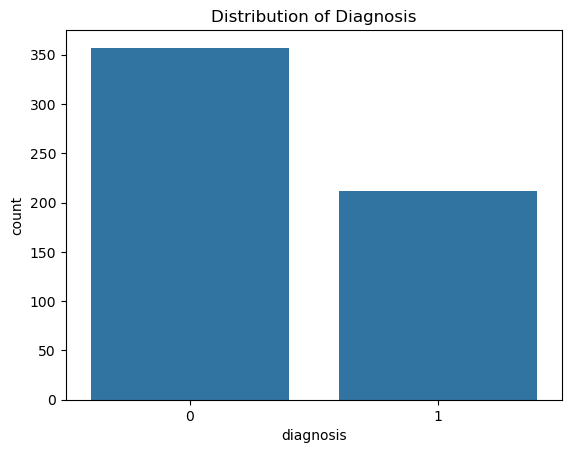

In [103]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

# 4. Data Preprocessing

a. Convert categorical target to numeric

In [24]:
label_encoder = LabelEncoder()
data["diagnosis"] = label_encoder.fit_transform(data["diagnosis"])

b. Separate features and target

In [25]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

c. Standardize Features

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

d. Train-Test Split
- Split the dataset into training and testing sets.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Model Building
a. Choose Algorithms
- Using algorithms Random Forest.

In [28]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

b. Hyperparameter Tuning

In [29]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estim

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=10, n_

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estim

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=400; 

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total 

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total 

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=500;

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total tim

[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=15, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=15, n_estimators=500; total time=   1.9s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=15, n_estimators=500; total time=   1.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=400; to

[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.8s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total ti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=2)

c. Best Model

In [30]:
best_rf = grid_search.best_estimator_

# 6. Model Evaluation
Evaluate the model's performance using metrics like accuracy, confusion matrix, and classification report.

a.Predictions

In [32]:
y_pred = best_rf.predict(X_test)

b. Classification Report

In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



c. Confusion Matrix

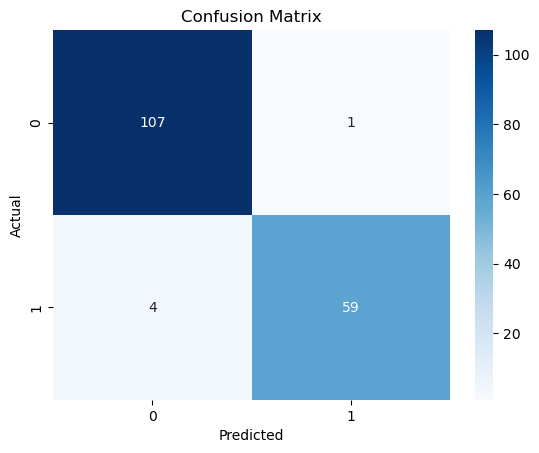

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

d. ROC-AUC Curve

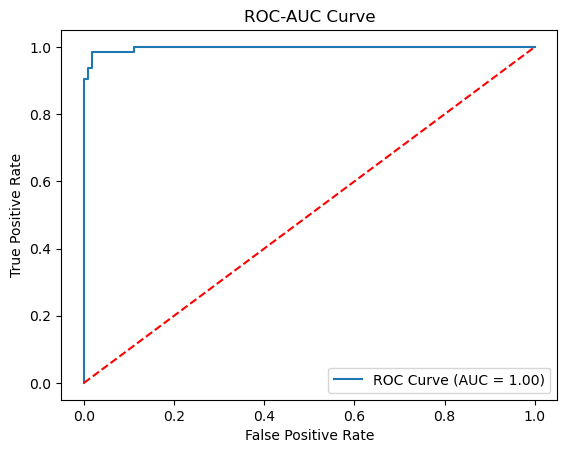

[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END max_depth=40, min_samples_leaf=6, min_samples_split=5, n_estimators=500; total tim

In [35]:
y_prob = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

e. Feature Importance

In [36]:
importances = best_rf.feature_importances_
feature_names = data.columns[:-1]
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                   Feature  Importance
7           concavity_mean    0.138475
27         concavity_worst    0.127745
22           texture_worst    0.121634
23         perimeter_worst    0.119309
20    fractal_dimension_se    0.070202
6         compactness_mean    0.064397
2             texture_mean    0.051214
3           perimeter_mean    0.047101
26       compactness_worst    0.038899
0                diagnosis    0.032929
13            perimeter_se    0.029844
21            radius_worst    0.018582
25        smoothness_worst    0.016402
10  fractal_dimension_mean    0.013686
28    concave_points_worst    0.013394
5          smoothness_mean    0.013066
1              radius_mean    0.012966
12              texture_se    0.009077
24              area_worst    0.008867
9            symmetry_mean    0.006495
29          symmetry_worst    0.006288
4                area_mean    0.005698
15           smoothness_se    0.005179
14                 area_se    0.004993
16  

f. Visualize Feature Importance

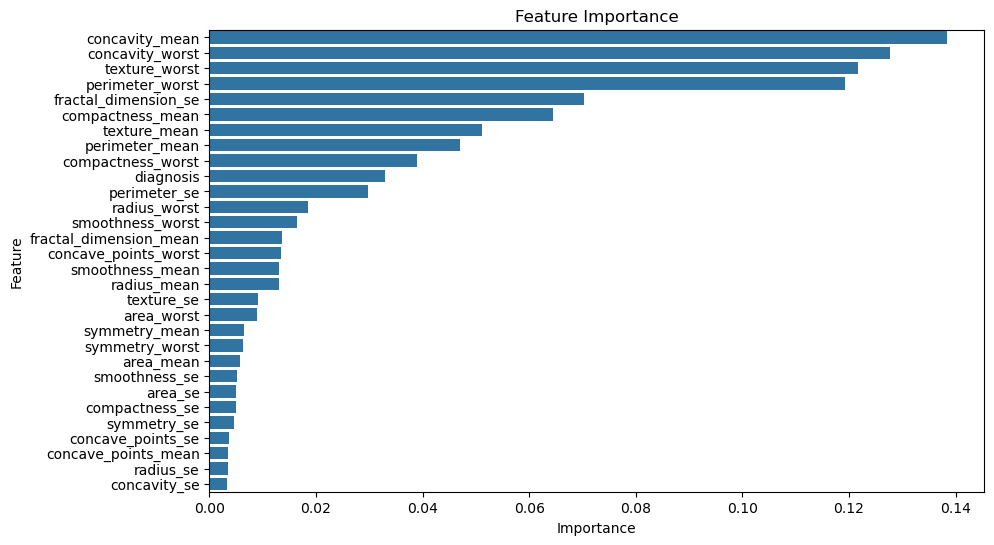

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

# 9. Saving the Trained Model
Use joblib to save the trained model.

In [52]:
import joblib
joblib.dump(best_rf, "breast_cancer_model.pkl")
print("Model saved as 'breast_cancer_model.pkl'")

Model saved as 'breast_cancer_model.pkl'


# 10. Making Predictions with the Trained Model

In [106]:

# Load the trained model
rf_model = joblib.load('breast_cancer_model.pkl')

# Example input data
input_data = (15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.139,0.5954,0.6305,0.2393,0.4667,0.09946)

# Convert input to numpy array
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

# Ensure the scaler is the same one used during training
input_data_scaled = scaler.transform(input_data_as_numpy_array)

# Make prediction
prediction = rf_model.predict(input_data_scaled)

print(prediction)

if prediction[0] == 1:
    print("Malignant")
else:
    print("Benign")

[1]
Malignant


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Explainability with SHAP

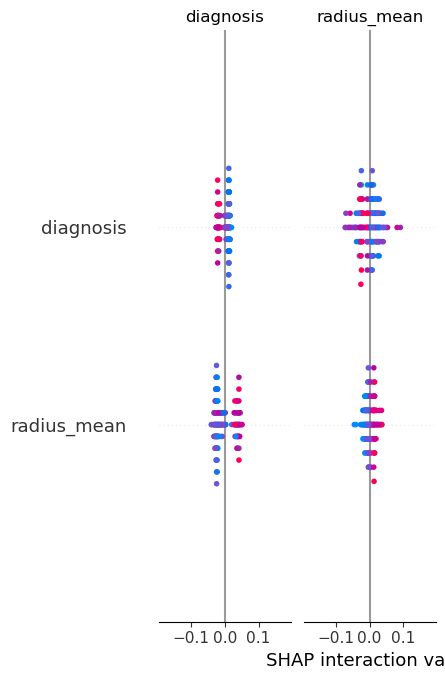

In [101]:
# Ensure DataFrame consistency
X_test_df = pd.DataFrame(X_test, columns=feature_names)
# SHAP Explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_df)

# Summary Plot
shap.summary_plot(shap_values[:], X_test_df, feature_names=feature_names)